In [1]:
import pandas as pd
import numpy as np


In [2]:
#Import all of our data.
df = pd.read_csv("C:\\Users\\dale\\OneDrive\\Documents\\Uni\\Data Exploration and Visualisation\\Project\Data\\solar-bonus-data.csv")
df_postcodes = pd.read_csv("C:\\Users\\dale\\OneDrive\\Documents\\Uni\\Data Exploration and Visualisation\\Project\Data\\SydneyMetro_Postcodes.csv")
df_census_B01 = pd.read_csv("C:\\Users\\dale\\OneDrive\\Documents\\Uni\\Data Exploration and Visualisation\\Project\Data\\2011_BCP_POA_for_NSW_short-header\\2011 Census BCP Postal Areas for NSW\\NSW\\2011Census_B01_NSW_POA_short.csv")
df_census_B02 = pd.read_csv("C:\\Users\\dale\\OneDrive\\Documents\\Uni\\Data Exploration and Visualisation\\Project\Data\\2011_BCP_POA_for_NSW_short-header\\2011 Census BCP Postal Areas for NSW\\NSW\\2011Census_B02_NSW_POA_short.csv")
df_census_B14 = pd.read_csv("C:\\Users\\dale\\OneDrive\\Documents\\Uni\\Data Exploration and Visualisation\\Project\Data\\2011_BCP_POA_for_NSW_short-header\\2011 Census BCP Postal Areas for NSW\\NSW\\2011Census_B14_NSW_POA_short.csv")
df_census_B20a = pd.read_csv("C:\\Users\\dale\\OneDrive\\Documents\\Uni\\Data Exploration and Visualisation\\Project\Data\\2011_BCP_POA_for_NSW_short-header\\2011 Census BCP Postal Areas for NSW\\NSW\\2011Census_B20a_NSW_POA_short.csv")
df_census_B20b = pd.read_csv("C:\\Users\\dale\\OneDrive\\Documents\\Uni\\Data Exploration and Visualisation\\Project\Data\\2011_BCP_POA_for_NSW_short-header\\2011 Census BCP Postal Areas for NSW\\NSW\\2011Census_B20b_NSW_POA_short.csv")
df_census_B29 = pd.read_csv("C:\\Users\\dale\\OneDrive\\Documents\\Uni\\Data Exploration and Visualisation\\Project\Data\\2011_BCP_POA_for_NSW_short-header\\2011 Census BCP Postal Areas for NSW\\NSW\\2011Census_B29_NSW_POA_short.csv")
df_census_B31 = pd.read_csv("C:\\Users\\dale\\OneDrive\\Documents\\Uni\\Data Exploration and Visualisation\\Project\Data\\2011_BCP_POA_for_NSW_short-header\\2011 Census BCP Postal Areas for NSW\\NSW\\2011Census_B31_NSW_POA_short.csv")
df_census_B35 = pd.read_csv("C:\\Users\\dale\\OneDrive\\Documents\\Uni\\Data Exploration and Visualisation\\Project\Data\\2011_BCP_POA_for_NSW_short-header\\2011 Census BCP Postal Areas for NSW\\NSW\\2011Census_B35_NSW_POA_short.csv")
df_census_B36 = pd.read_csv("C:\\Users\\dale\\OneDrive\\Documents\\Uni\\Data Exploration and Visualisation\\Project\Data\\2011_BCP_POA_for_NSW_short-header\\2011 Census BCP Postal Areas for NSW\\NSW\\2011Census_B36_NSW_POA_short.csv")
df_census_B45a = pd.read_csv("C:\\Users\\dale\\OneDrive\\Documents\\Uni\\Data Exploration and Visualisation\\Project\Data\\2011_BCP_POA_for_NSW_short-header\\2011 Census BCP Postal Areas for NSW\\NSW\\2011Census_B45a_NSW_POA_short.csv")
df_census_B45b = pd.read_csv("C:\\Users\\dale\\OneDrive\\Documents\\Uni\\Data Exploration and Visualisation\\Project\Data\\2011_BCP_POA_for_NSW_short-header\\2011 Census BCP Postal Areas for NSW\\NSW\\2011Census_B45b_NSW_POA_short.csv")
df_census_Area = pd.read_csv("C:\\Users\\dale\\OneDrive\\Documents\\Uni\\Data Exploration and Visualisation\\Project\Data\\2011_BCP_POA_for_NSW_short-header\\Metadata\\NSW_Census2011_Area.csv")

In [3]:
#Rename the Suburb column so it can be joined.
df['Suburb2']=df['Suburb']
del df['Suburb']
#Join
df_final = df_postcodes.set_index('Postcode').join(df.set_index('Postcode'))
#Get rid of strings
df_final['Capacity size (kW)'] = pd.to_numeric(df_final['Capacity size (kW)'], errors='coerce')
df_final.dropna(subset = ['Capacity size (kW)'])
#Flatten
df_final = df_final.reset_index()


In [4]:
#Group our data so we get the per suburb information
aggregations = {
    'Capacity size (kW)': { # work on the Capacity column
        'total_kw': 'sum',  # get the sum,
        'average_kw': 'mean', # get mean,
        'num_units': 'count' # get count
    }
    }
df_new = df_final.groupby(['District','Postcode','Suburb'])['Capacity size (kW)'].agg(aggregations)
df_new = df_new.reset_index()

In [5]:
#Join the data to our suburb data.
df_census_B01['Postcode'] = df_census_B01['region_id'].str[-4:].astype(int)
df_census_B01_sub = df_census_B01[['Postcode','Tot_P_M','Tot_P_F','Tot_P_P','Birthplace_Australia_P','Birthplace_Elsewhere_P','Lang_spoken_home_Eng_only_P','Lang_spoken_home_Oth_Lang_P','Australian_citizen_P','Count_psns_occ_priv_dwgs_P']]

In [6]:
df_new = df_new.set_index('Postcode').join(df_census_B01_sub.set_index('Postcode').astype(float))
df_new = df_new.reset_index()
df_new.head()

C:\Users\Dale\Anaconda3\lib\site-packages\pandas\tools\merge.py:536: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,Postcode,"(District, )","(Suburb, )","(Capacity size (kW), total_kw)","(Capacity size (kW), num_units)","(Capacity size (kW), average_kw)",Tot_P_M,Tot_P_F,Tot_P_P,Birthplace_Australia_P,Birthplace_Elsewhere_P,Lang_spoken_home_Eng_only_P,Lang_spoken_home_Oth_Lang_P,Australian_citizen_P,Count_psns_occ_priv_dwgs_P
0,2000,Central & Inner Metropolitan,Sydney City,NaN,0,NaN,11726.0,11034.0,22760.0,4343.0,13992.0,6426.0,11971.0,7925.0,17645.0
1,2007,Central & Inner Metropolitan,Ultimo,6.55,4,1.637500,3644.0,3467.0,7111.0,1601.0,4081.0,2063.0,3648.0,2787.0,5216.0
2,2008,Central & Inner Metropolitan,Chippendale,59.33,25,2.373200,3394.0,2900.0,6294.0,2824.0,2702.0,3549.0,1992.0,3721.0,5193.0
3,2009,Central & Inner Metropolitan,Pyrmont,21.61,7,3.087143,5912.0,5707.0,11619.0,4595.0,5690.0,6186.0,4125.0,6996.0,10189.0
4,2010,Central & Inner Metropolitan,Surry Hills,133.04,47,2.830638,14794.0,10609.0,25403.0,11623.0,10262.0,16190.0,5797.0,16137.0,20599.0


In [7]:
df_new.rename(columns={list(df_new)[1] : 'District', list(df_new)[2] : 'Suburb', list(df_new)[3] : 'total_KW', list(df_new)[5]: 'Average_KW', list(df_new)[4] : 'num_units'}, inplace=True)

In [8]:
df_census_B02['Postcode'] = df_census_B02['region_id'].str[-4:].astype(int)
df_new = df_new.set_index('Postcode').join(df_census_B02.set_index('Postcode'))

In [9]:
df_new.head()

,District,Suburb,total_KW,num_units,Average_KW,Tot_P_M,Tot_P_F,Tot_P_P,Birthplace_Australia_P,Birthplace_Elsewhere_P,...,Count_psns_occ_priv_dwgs_P,region_id,Median_age_persons,Median_mortgage_repay_monthly,Median_Tot_prsnl_inc_weekly,Median_rent_weekly,Median_Tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_Tot_hhd_inc_weekly,Average_household_size
Postcode,,,,,,,,,,,,,,,,,,,,,
2000,Central & Inner Metropolitan,Sydney City,NaN,0,NaN,11726.0,11034.0,22760.0,4343.0,13992.0,...,17645.0,POA2000,29,2600,578,600,1623,1.4,1422,2.1
2007,Central & Inner Metropolitan,Ultimo,6.55,4,1.637500,3644.0,3467.0,7111.0,1601.0,4081.0,...,5216.0,POA2007,27,2280,487,460,1555,1.4,1099,2.0
2008,Central & Inner Metropolitan,Chippendale,59.33,25,2.373200,3394.0,2900.0,6294.0,2824.0,2702.0,...,5193.0,POA2008,29,2200,698,454,1977,1.3,1459,2.1
2009,Central & Inner Metropolitan,Pyrmont,21.61,7,3.087143,5912.0,5707.0,11619.0,4595.0,5690.0,...,10189.0,POA2009,32,2778,1095,575,2525,1.3,2184,2.1
2010,Central & Inner Metropolitan,Surry Hills,133.04,47,2.830638,14794.0,10609.0,25403.0,11623.0,10262.0,...,20599.0,POA2010,34,2500,1038,450,2545,1.2,1796,1.8


In [10]:
df_census_B14['Postcode'] = df_census_B14['region_id'].str[-4:].astype(int)
df_census_B14_sub = df_census_B14[['Postcode','Buddhism_P','Christianity_Tot_P','Hinduism_P','Islam_P','Judaism_P','No_Religion_P']]
df_new = df_new.reset_index()
df_new = df_new.set_index('Postcode').join(df_census_B14_sub.set_index('Postcode'))
df_new.head()

,District,Suburb,total_KW,num_units,Average_KW,Tot_P_M,Tot_P_F,Tot_P_P,Birthplace_Australia_P,Birthplace_Elsewhere_P,...,Median_Tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_Tot_hhd_inc_weekly,Average_household_size,Buddhism_P,Christianity_Tot_P,Hinduism_P,Islam_P,Judaism_P,No_Religion_P
Postcode,,,,,,,,,,,,,,,,,,,,,
2000,Central & Inner Metropolitan,Sydney City,NaN,0,NaN,11726.0,11034.0,22760.0,4343.0,13992.0,...,1623,1.4,1422,2.1,3837,6842,440,395,105,5958
2007,Central & Inner Metropolitan,Ultimo,6.55,4,1.637500,3644.0,3467.0,7111.0,1601.0,4081.0,...,1555,1.4,1099,2.0,794,1718,182,255,14,2417
2008,Central & Inner Metropolitan,Chippendale,59.33,25,2.373200,3394.0,2900.0,6294.0,2824.0,2702.0,...,1977,1.3,1459,2.1,411,1754,129,122,29,2734
2009,Central & Inner Metropolitan,Pyrmont,21.61,7,3.087143,5912.0,5707.0,11619.0,4595.0,5690.0,...,2525,1.3,2184,2.1,809,4829,228,160,72,3699
2010,Central & Inner Metropolitan,Surry Hills,133.04,47,2.830638,14794.0,10609.0,25403.0,11623.0,10262.0,...,2545,1.2,1796,1.8,1366,9181,357,341,364,9220


In [11]:
df_census_B20a['Postcode'] = df_census_B20a['region_id'].str[-4:].astype(int)
df_census_B20a_sub = df_census_B20a[['Postcode','M_Tot_DUDW_LT_5_h','M_Tot_DUDW_5_14_h','M_Tot_DUDW_15_29_h','M_Tot_DUDW_30_h_mo','F_Tot_DUDW_LT_5_h','F_Tot_DUDW_5_14_h','F_Tot_DUDW_15_29_h','F_Tot_DUDW_30_h_mo']]
df_new = df_new.reset_index()
df_new = df_new.set_index('Postcode').join(df_census_B20a_sub.set_index('Postcode'))
df_new.head()

,District,Suburb,total_KW,num_units,Average_KW,Tot_P_M,Tot_P_F,Tot_P_P,Birthplace_Australia_P,Birthplace_Elsewhere_P,...,Judaism_P,No_Religion_P,M_Tot_DUDW_LT_5_h,M_Tot_DUDW_5_14_h,M_Tot_DUDW_15_29_h,M_Tot_DUDW_30_h_mo,F_Tot_DUDW_LT_5_h,F_Tot_DUDW_5_14_h,F_Tot_DUDW_15_29_h,F_Tot_DUDW_30_h_mo
Postcode,,,,,,,,,,,,,,,,,,,,,
2000,Central & Inner Metropolitan,Sydney City,NaN,0,NaN,11726.0,11034.0,22760.0,4343.0,13992.0,...,105,5958,2725,1465,269,105,2130,1796,619,451
2007,Central & Inner Metropolitan,Ultimo,6.55,4,1.637500,3644.0,3467.0,7111.0,1601.0,4081.0,...,14,2417,908,523,89,38,802,611,176,119
2008,Central & Inner Metropolitan,Chippendale,59.33,25,2.373200,3394.0,2900.0,6294.0,2824.0,2702.0,...,29,2734,1110,708,108,38,886,731,172,97
2009,Central & Inner Metropolitan,Pyrmont,21.61,7,3.087143,5912.0,5707.0,11619.0,4595.0,5690.0,...,72,3699,1946,1125,186,69,1382,1421,478,350
2010,Central & Inner Metropolitan,Surry Hills,133.04,47,2.830638,14794.0,10609.0,25403.0,11623.0,10262.0,...,364,9220,5138,3002,433,188,3401,2609,610,366


In [12]:
df_census_B29['Postcode'] = df_census_B29['region_id'].str[-4:].astype(int)
df_census_B29_sub = df_census_B29[['Postcode','Num_MVs_per_dweling_0_MVs','Num_MVs_per_dweling_1_MVs','Num_MVs_per_dweling_2_MVs','Num_MVs_per_dweling_3_MVs','Num_MVs_per_dweling_4mo_MVs','Num_MVs_per_dweling_Tot']]
df_new = df_new.reset_index()
df_new = df_new.set_index('Postcode').join(df_census_B29_sub.set_index('Postcode'))
df_new.head()

,District,Suburb,total_KW,num_units,Average_KW,Tot_P_M,Tot_P_F,Tot_P_P,Birthplace_Australia_P,Birthplace_Elsewhere_P,...,F_Tot_DUDW_LT_5_h,F_Tot_DUDW_5_14_h,F_Tot_DUDW_15_29_h,F_Tot_DUDW_30_h_mo,Num_MVs_per_dweling_0_MVs,Num_MVs_per_dweling_1_MVs,Num_MVs_per_dweling_2_MVs,Num_MVs_per_dweling_3_MVs,Num_MVs_per_dweling_4mo_MVs,Num_MVs_per_dweling_Tot
Postcode,,,,,,,,,,,,,,,,,,,,,
2000,Central & Inner Metropolitan,Sydney City,NaN,0,NaN,11726.0,11034.0,22760.0,4343.0,13992.0,...,2130,1796,619,451,4670,2797,493,50,20,8030
2007,Central & Inner Metropolitan,Ultimo,6.55,4,1.637500,3644.0,3467.0,7111.0,1601.0,4081.0,...,802,611,176,119,1389,951,153,15,7,2515
2008,Central & Inner Metropolitan,Chippendale,59.33,25,2.373200,3394.0,2900.0,6294.0,2824.0,2702.0,...,886,731,172,97,1150,1050,225,36,7,2468
2009,Central & Inner Metropolitan,Pyrmont,21.61,7,3.087143,5912.0,5707.0,11619.0,4595.0,5690.0,...,1382,1421,478,350,1406,2623,799,78,19,4925
2010,Central & Inner Metropolitan,Surry Hills,133.04,47,2.830638,14794.0,10609.0,25403.0,11623.0,10262.0,...,3401,2609,610,366,5442,4801,997,87,33,11360


In [13]:
df_census_B31['Postcode'] = df_census_B31['region_id'].str[-4:].astype(int)
df_census_B31_sub = df_census_B31[['Postcode','OPDs_Tot_OPDs_Dwellings','OPDs_Tot_OPDs_Persons','Unoccupied_PDs_Dwgs']]
df_new = df_new.reset_index()
df_new = df_new.set_index('Postcode').join(df_census_B31_sub.set_index('Postcode'))
df_new.head()


,District,Suburb,total_KW,num_units,Average_KW,Tot_P_M,Tot_P_F,Tot_P_P,Birthplace_Australia_P,Birthplace_Elsewhere_P,...,F_Tot_DUDW_30_h_mo,Num_MVs_per_dweling_0_MVs,Num_MVs_per_dweling_1_MVs,Num_MVs_per_dweling_2_MVs,Num_MVs_per_dweling_3_MVs,Num_MVs_per_dweling_4mo_MVs,Num_MVs_per_dweling_Tot,OPDs_Tot_OPDs_Dwellings,OPDs_Tot_OPDs_Persons,Unoccupied_PDs_Dwgs
Postcode,,,,,,,,,,,,,,,,,,,,,
2000,Central & Inner Metropolitan,Sydney City,NaN,0,NaN,11726.0,11034.0,22760.0,4343.0,13992.0,...,451,4670,2797,493,50,20,8030,8297,17645,1751
2007,Central & Inner Metropolitan,Ultimo,6.55,4,1.637500,3644.0,3467.0,7111.0,1601.0,4081.0,...,119,1389,951,153,15,7,2515,2583,5218,215
2008,Central & Inner Metropolitan,Chippendale,59.33,25,2.373200,3394.0,2900.0,6294.0,2824.0,2702.0,...,97,1150,1050,225,36,7,2468,2534,5190,241
2009,Central & Inner Metropolitan,Pyrmont,21.61,7,3.087143,5912.0,5707.0,11619.0,4595.0,5690.0,...,350,1406,2623,799,78,19,4925,5016,10191,572
2010,Central & Inner Metropolitan,Surry Hills,133.04,47,2.830638,14794.0,10609.0,25403.0,11623.0,10262.0,...,366,5442,4801,997,87,33,11360,11695,20598,1694


In [14]:
df_census_B35['Postcode'] = df_census_B35['region_id'].str[-4:].astype(int)
df_census_B35_sub = df_census_B35[['Postcode','No_IC_Total','Tof_IC_BrdB_Total','Tof_IC_D_up_Total','Tof_IC_Other_Total']]
df_new = df_new.reset_index()
df_new = df_new.set_index('Postcode').join(df_census_B35_sub.set_index('Postcode'))
df_new.head()

,District,Suburb,total_KW,num_units,Average_KW,Tot_P_M,Tot_P_F,Tot_P_P,Birthplace_Australia_P,Birthplace_Elsewhere_P,...,Num_MVs_per_dweling_3_MVs,Num_MVs_per_dweling_4mo_MVs,Num_MVs_per_dweling_Tot,OPDs_Tot_OPDs_Dwellings,OPDs_Tot_OPDs_Persons,Unoccupied_PDs_Dwgs,No_IC_Total,Tof_IC_BrdB_Total,Tof_IC_D_up_Total,Tof_IC_Other_Total
Postcode,,,,,,,,,,,,,,,,,,,,,
2000,Central & Inner Metropolitan,Sydney City,NaN,0,NaN,11726.0,11034.0,22760.0,4343.0,13992.0,...,50,20,8030,8297,17645,1751,717,6672,154,424
2007,Central & Inner Metropolitan,Ultimo,6.55,4,1.637500,3644.0,3467.0,7111.0,1601.0,4081.0,...,15,7,2515,2583,5218,215,255,2037,73,137
2008,Central & Inner Metropolitan,Chippendale,59.33,25,2.373200,3394.0,2900.0,6294.0,2824.0,2702.0,...,36,7,2468,2534,5190,241,246,2019,47,148
2009,Central & Inner Metropolitan,Pyrmont,21.61,7,3.087143,5912.0,5707.0,11619.0,4595.0,5690.0,...,78,19,4925,5016,10191,572,381,4168,86,264
2010,Central & Inner Metropolitan,Surry Hills,133.04,47,2.830638,14794.0,10609.0,25403.0,11623.0,10262.0,...,87,33,11360,11695,20598,1694,1442,8750,235,913


In [15]:
df_census_B36['Postcode'] = df_census_B36['region_id'].str[-4:].astype(int)
df_census_B36_sub = df_census_B36[['Postcode','Total_NofB_0_i_b','Total_NofB_1','Total_NofB_2','Total_NofB_3','Total_NofB_4','Total_NofB_5','Total_NofB_6_or_m']]
df_new = df_new.reset_index()
df_new = df_new.set_index('Postcode').join(df_census_B36_sub.set_index('Postcode'))
df_new.head()

,District,Suburb,total_KW,num_units,Average_KW,Tot_P_M,Tot_P_F,Tot_P_P,Birthplace_Australia_P,Birthplace_Elsewhere_P,...,Tof_IC_BrdB_Total,Tof_IC_D_up_Total,Tof_IC_Other_Total,Total_NofB_0_i_b,Total_NofB_1,Total_NofB_2,Total_NofB_3,Total_NofB_4,Total_NofB_5,Total_NofB_6_or_m
Postcode,,,,,,,,,,,,,,,,,,,,,
2000,Central & Inner Metropolitan,Sydney City,NaN,0,NaN,11726.0,11034.0,22760.0,4343.0,13992.0,...,6672,154,424,411,2662,3820,1059,71,17,42
2007,Central & Inner Metropolitan,Ultimo,6.55,4,1.637500,3644.0,3467.0,7111.0,1601.0,4081.0,...,2037,73,137,171,1029,999,259,57,14,7
2008,Central & Inner Metropolitan,Chippendale,59.33,25,2.373200,3394.0,2900.0,6294.0,2824.0,2702.0,...,2019,47,148,158,737,884,433,209,43,19
2009,Central & Inner Metropolitan,Pyrmont,21.61,7,3.087143,5912.0,5707.0,11619.0,4595.0,5690.0,...,4168,86,264,53,1215,2557,1055,60,3,3
2010,Central & Inner Metropolitan,Surry Hills,133.04,47,2.830638,14794.0,10609.0,25403.0,11623.0,10262.0,...,8750,235,913,855,4433,4194,1386,409,110,65


In [16]:
df_census_B45a['Postcode'] = df_census_B45a['region_id'].str[-4:].astype(int)
df_census_B45a_sub = df_census_B45a[['Postcode','F_Tot_Tot','M_Tot_Tot']]
df_new = df_new.reset_index()
df_new = df_new.set_index('Postcode').join(df_census_B45a_sub.set_index('Postcode'))
df_new.head()

,District,Suburb,total_KW,num_units,Average_KW,Tot_P_M,Tot_P_F,Tot_P_P,Birthplace_Australia_P,Birthplace_Elsewhere_P,...,Tof_IC_Other_Total,Total_NofB_0_i_b,Total_NofB_1,Total_NofB_2,Total_NofB_3,Total_NofB_4,Total_NofB_5,Total_NofB_6_or_m,F_Tot_Tot,M_Tot_Tot
Postcode,,,,,,,,,,,,,,,,,,,,,
2000,Central & Inner Metropolitan,Sydney City,NaN,0,NaN,11726.0,11034.0,22760.0,4343.0,13992.0,...,424,411,2662,3820,1059,71,17,42,5043,6059
2007,Central & Inner Metropolitan,Ultimo,6.55,4,1.637500,3644.0,3467.0,7111.0,1601.0,4081.0,...,137,171,1029,999,259,57,14,7,1471,1707
2008,Central & Inner Metropolitan,Chippendale,59.33,25,2.373200,3394.0,2900.0,6294.0,2824.0,2702.0,...,148,158,737,884,433,209,43,19,1659,1978
2009,Central & Inner Metropolitan,Pyrmont,21.61,7,3.087143,5912.0,5707.0,11619.0,4595.0,5690.0,...,264,53,1215,2557,1055,60,3,3,3259,3799
2010,Central & Inner Metropolitan,Surry Hills,133.04,47,2.830638,14794.0,10609.0,25403.0,11623.0,10262.0,...,913,855,4433,4194,1386,409,110,65,6473,9473


In [17]:
df_census_B45b['Postcode'] = df_census_B45b['region_id'].str[-4:].astype(int)
df_census_B45b_sub = df_census_B45b[['Postcode','P_Tot_Managers','P_Tot_Professionals','P_Tot_TechnicTrades_W','P_Tot_CommunPersnlSvc_W','P_Tot_ClericalAdminis_W','P_Tot_Sales_W','P_Tot_Mach_oper_drivers','P_Tot_Labourers']]
df_new = df_new.reset_index()
df_new = df_new.set_index('Postcode').join(df_census_B45b_sub.set_index('Postcode'))
df_new.head()

,District,Suburb,total_KW,num_units,Average_KW,Tot_P_M,Tot_P_F,Tot_P_P,Birthplace_Australia_P,Birthplace_Elsewhere_P,...,F_Tot_Tot,M_Tot_Tot,P_Tot_Managers,P_Tot_Professionals,P_Tot_TechnicTrades_W,P_Tot_CommunPersnlSvc_W,P_Tot_ClericalAdminis_W,P_Tot_Sales_W,P_Tot_Mach_oper_drivers,P_Tot_Labourers
Postcode,,,,,,,,,,,,,,,,,,,,,
2000,Central & Inner Metropolitan,Sydney City,NaN,0,NaN,11726.0,11034.0,22760.0,4343.0,13992.0,...,5043,6059,1663,3457,985,1331,1298,997,133,907
2007,Central & Inner Metropolitan,Ultimo,6.55,4,1.637500,3644.0,3467.0,7111.0,1601.0,4081.0,...,1471,1707,371,1072,268,373,445,315,56,202
2008,Central & Inner Metropolitan,Chippendale,59.33,25,2.373200,3394.0,2900.0,6294.0,2824.0,2702.0,...,1659,1978,426,1461,291,350,520,340,51,137
2009,Central & Inner Metropolitan,Pyrmont,21.61,7,3.087143,5912.0,5707.0,11619.0,4595.0,5690.0,...,3259,3799,1432,2710,486,564,959,446,88,218
2010,Central & Inner Metropolitan,Surry Hills,133.04,47,2.830638,14794.0,10609.0,25403.0,11623.0,10262.0,...,6473,9473,2805,6674,1109,1405,1835,1150,165,535


In [18]:
df_census_Area['Postcode'] = df_census_Area['Code'].str[-4:].astype(int)
df_census_Area_sub = df_census_Area[['Postcode','Area sqkm']]
df_new = df_new.reset_index()
df_new = df_new.set_index('Postcode').join(df_census_Area_sub.set_index('Postcode'))
df_new.head()

,District,Suburb,total_KW,num_units,Average_KW,Tot_P_M,Tot_P_F,Tot_P_P,Birthplace_Australia_P,Birthplace_Elsewhere_P,...,M_Tot_Tot,P_Tot_Managers,P_Tot_Professionals,P_Tot_TechnicTrades_W,P_Tot_CommunPersnlSvc_W,P_Tot_ClericalAdminis_W,P_Tot_Sales_W,P_Tot_Mach_oper_drivers,P_Tot_Labourers,Area sqkm
Postcode,,,,,,,,,,,,,,,,,,,,,
2000,Central & Inner Metropolitan,Sydney City,NaN,0,NaN,11726.0,11034.0,22760.0,4343.0,13992.0,...,6059,1663,3457,985,1331,1298,997,133,907,4.279440
2007,Central & Inner Metropolitan,Ultimo,6.55,4,1.637500,3644.0,3467.0,7111.0,1601.0,4081.0,...,1707,371,1072,268,373,445,315,56,202,0.558425
2008,Central & Inner Metropolitan,Chippendale,59.33,25,2.373200,3394.0,2900.0,6294.0,2824.0,2702.0,...,1978,426,1461,291,350,520,340,51,137,0.844341
2009,Central & Inner Metropolitan,Pyrmont,21.61,7,3.087143,5912.0,5707.0,11619.0,4595.0,5690.0,...,3799,1432,2710,486,564,959,446,88,218,0.932580
2010,Central & Inner Metropolitan,Surry Hills,133.04,47,2.830638,14794.0,10609.0,25403.0,11623.0,10262.0,...,9473,2805,6674,1109,1405,1835,1150,165,535,2.173840


Lets do some calculations:
Dwellings / Area
People  / Area
Sol_Units / Dwelling
Sol_Units / 1000 People
Sol_Units / Area



In [19]:
df_new['Unit_per_1000'] = df_new['num_units'] / (df_new['Tot_P_P'] / 1000)
df_new['dwel_dens'] =   df_new['OPDs_Tot_OPDs_Dwellings'] / df_new['Area sqkm']
df_new['pop_dens'] =   df_new['Tot_P_P'] / df_new['Area sqkm']
df_new['unit_dens'] =   df_new['num_units'] / df_new['Area sqkm']
df_new['unit_dwel'] =   df_new['num_units'] / (df_new['OPDs_Tot_OPDs_Dwellings'] / 100)

In [20]:
df_new = df_new.reset_index()
df_main = df_new[['Postcode','District','Suburb','total_KW','num_units','Tot_P_M','Tot_P_F','Tot_P_P','OPDs_Tot_OPDs_Dwellings','Unit_per_1000','dwel_dens','pop_dens','unit_dens','unit_dwel']]
df_occ = df_new[['Postcode','District','Suburb','total_KW','num_units','Average_KW','unit_dwel','unit_dens','pop_dens','Unit_per_1000','dwel_dens','Tot_P_M','Tot_P_F','Tot_P_P','OPDs_Tot_OPDs_Dwellings','Median_age_persons','Median_mortgage_repay_monthly','Median_Tot_prsnl_inc_weekly','Median_rent_weekly','Median_Tot_fam_inc_weekly','Average_num_psns_per_bedroom','Median_Tot_hhd_inc_weekly','Average_household_size','P_Tot_Managers','P_Tot_Professionals','P_Tot_TechnicTrades_W','P_Tot_CommunPersnlSvc_W','P_Tot_ClericalAdminis_W','P_Tot_Sales_W','P_Tot_Mach_oper_drivers','P_Tot_Labourers','Tot_P_P']]
df_reg = df_new[['Postcode','District','Suburb','total_KW','num_units','Average_KW','unit_dwel','unit_dens','pop_dens','Unit_per_1000','dwel_dens','Buddhism_P','Christianity_Tot_P','Hinduism_P','Islam_P','Judaism_P','No_Religion_P','Median_Tot_fam_inc_weekly','Average_household_size','Tot_P_P']]
df_hou_act = df_new[['Postcode','District','Suburb','total_KW','num_units','Average_KW','unit_dwel','unit_dens','pop_dens','Unit_per_1000','dwel_dens','M_Tot_DUDW_LT_5_h','M_Tot_DUDW_5_14_h','M_Tot_DUDW_15_29_h','M_Tot_DUDW_30_h_mo','F_Tot_DUDW_LT_5_h','F_Tot_DUDW_5_14_h','F_Tot_DUDW_15_29_h','F_Tot_DUDW_30_h_mo','Total_NofB_0_i_b','Total_NofB_1','Total_NofB_2','Total_NofB_3','Total_NofB_4','Total_NofB_5','Total_NofB_6_or_m','Num_MVs_per_dweling_0_MVs','Num_MVs_per_dweling_1_MVs','Num_MVs_per_dweling_2_MVs','Num_MVs_per_dweling_3_MVs','Num_MVs_per_dweling_4mo_MVs','OPDs_Tot_OPDs_Dwellings','Average_num_psns_per_bedroom','Median_Tot_hhd_inc_weekly','Average_household_size','Tot_P_P']]
df_hou_att = df_new[['Postcode','District','Suburb','total_KW','num_units','Average_KW','unit_dwel','unit_dens','pop_dens','Unit_per_1000','dwel_dens','Total_NofB_0_i_b','Total_NofB_1','Total_NofB_2','Total_NofB_3','Total_NofB_4','Total_NofB_5','Total_NofB_6_or_m','No_IC_Total','Tof_IC_BrdB_Total','Tof_IC_D_up_Total','Tof_IC_Other_Total','Num_MVs_per_dweling_0_MVs','Num_MVs_per_dweling_1_MVs','Num_MVs_per_dweling_2_MVs','Num_MVs_per_dweling_3_MVs','Num_MVs_per_dweling_4mo_MVs','Num_MVs_per_dweling_Tot','OPDs_Tot_OPDs_Dwellings','Tot_P_P']]

df_hou_act.to_csv('df_hou_act.csv')

In [32]:
def df_div(df,cols):
    for col in cols:
        new_col = col + "_div"
        df[new_col] = df['num_units'] / ( df[col] / 1000 )
    return df

def df_per(df,cols):
    for col in cols:
        new_col = col + "_pct"
        df[new_col] = (df[col] / df['Tot_P_P']) * 100
    return df

In [33]:
df_div(df_occ,['P_Tot_Managers','P_Tot_Professionals','P_Tot_TechnicTrades_W','P_Tot_CommunPersnlSvc_W','P_Tot_ClericalAdminis_W','P_Tot_Sales_W','P_Tot_Mach_oper_drivers','P_Tot_Labourers'])
df_div(df_reg,['Buddhism_P','Christianity_Tot_P','Hinduism_P','Islam_P','Judaism_P','No_Religion_P'])
df_div(df_hou_act,['M_Tot_DUDW_LT_5_h','M_Tot_DUDW_5_14_h','M_Tot_DUDW_15_29_h','M_Tot_DUDW_30_h_mo','F_Tot_DUDW_LT_5_h','F_Tot_DUDW_5_14_h','F_Tot_DUDW_15_29_h','F_Tot_DUDW_30_h_mo'])
#df_div(df_hou_att,['Total_NofB_0_i_b','Total_NofB_1','Total_NofB_2','Total_NofB_3','Total_NofB_4','Total_NofB_5','Total_NofB_6_or_m','No_IC_Total','Tof_IC_BrdB_Total','Tof_IC_D_up_Total','Tof_IC_Other_Total','Num_MVs_per_dweling_0_MVs','Num_MVs_per_dweling_1_MVs','Num_MVs_per_dweling_2_MVs','Num_MVs_per_dweling_3_MVs','Num_MVs_per_dweling_4mo_MVs'],'OPDs_Tot_OPDs_Dwellings')

C:\Users\Dale\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Postcode,District,Suburb,total_KW,num_units,Average_KW,unit_dwel,unit_dens,pop_dens,Unit_per_1000,...,Average_household_size,Tot_P_P,M_Tot_DUDW_LT_5_h_div,M_Tot_DUDW_5_14_h_div,M_Tot_DUDW_15_29_h_div,M_Tot_DUDW_30_h_mo_div,F_Tot_DUDW_LT_5_h_div,F_Tot_DUDW_5_14_h_div,F_Tot_DUDW_15_29_h_div,F_Tot_DUDW_30_h_mo_div
0,2000,Central & Inner Metropolitan,Sydney City,NaN,0,NaN,0.000000,0.000000,5318.452882,0.000000,...,2.1,22760.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2007,Central & Inner Metropolitan,Ultimo,6.55,4,1.637500,0.154859,7.163003,12734.028742,0.562509,...,2.0,7111.0,4.405286,7.648184,44.943820,105.263158,4.987531,6.546645,22.727273,33.613445
2,2008,Central & Inner Metropolitan,Chippendale,59.33,25,2.373200,0.986582,29.608890,7454.334209,3.972037,...,2.1,6294.0,22.522523,35.310734,231.481481,657.894737,28.216704,34.199726,145.348837,257.731959
3,2009,Central & Inner Metropolitan,Pyrmont,21.61,7,3.087143,0.139553,7.506058,12458.984752,0.602461,...,2.1,11619.0,3.597122,6.222222,37.634409,101.449275,5.065123,4.926108,14.644351,20.000000
4,2010,Central & Inner Metropolitan,Surry Hills,133.04,47,2.830638,0.401881,21.620726,11685.772642,1.850175,...,1.8,25403.0,9.147528,15.656229,108.545035,250.000000,13.819465,18.014565,77.049180,128.415301
5,2011,Central & Inner Metropolitan,Kings Cross,33.26,11,3.023636,0.120680,7.536673,12358.773030,0.609824,...,1.6,18038.0,3.436426,5.360624,36.544850,107.843137,4.356436,5.638134,21.484375,38.596491
6,2015,Central & Inner Metropolitan,Alexandria,118.72,44,2.698182,1.148825,10.460102,2003.822692,5.220074,...,2.0,8429.0,28.720627,40.552995,261.904762,800.000000,40.478381,34.810127,117.647059,216.748768
7,2016,Central & Inner Metropolitan,Redfern,71.20,37,1.924324,0.689398,31.573468,10269.910485,3.074366,...,1.9,12035.0,17.066421,26.001405,147.410359,366.336634,27.488856,28.051554,96.605744,130.742049
8,2017,Central & Inner Metropolitan,Waterloo,39.67,16,2.479375,0.247333,8.257340,7466.699696,1.105889,...,1.9,14468.0,7.455732,11.644833,66.945607,168.421053,10.362694,11.103400,36.697248,50.156740
9,2018,Central & Inner Metropolitan,Rosebery,196.66,88,2.234773,1.597966,19.206216,3360.651265,5.715028,...,2.6,15398.0,51.492101,70.400000,286.644951,546.583851,76.588338,60.647829,117.647059,115.789474


In [38]:
import seaborn as sns # just a conventional alias, don't know why
corr= df_hou_act.corr()
#corr.to_csv('df_occ.csv')

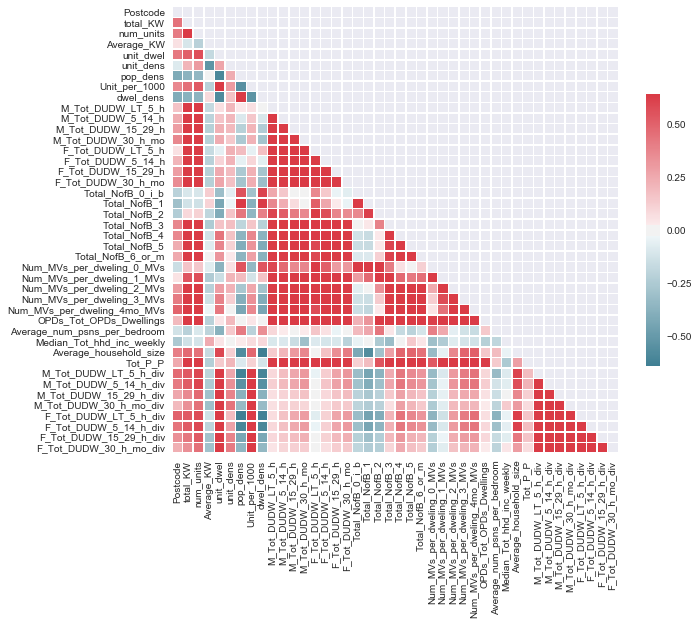

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Export the data to CSV

In [ ]:
df_new.to_csv("suburbs.csv")